# Get Data from csv files

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns




account_df = pd.read_csv("data/account.csv", sep=";")
card_df = pd.read_csv("data/card_dev.csv", sep=";")
client_df = pd.read_csv("data/client.csv", sep=";")
disp_df = pd.read_csv("data/disp.csv", sep=";")
district_df = pd.read_csv("data/district.csv",sep=";")
loan_df = pd.read_csv("data/loan_dev.csv", sep=";")
trans_df = pd.read_csv("data/trans_dev.csv",sep=";", low_memory=False)


df = loan_df.merge(disp_df, on='account_id')
df = df.merge(client_df, on='client_id')
df = df.merge(account_df, on='account_id')
df = df.merge(district_df, left_on='client_id', right_on='code ')
df = df.merge(trans_df, on='account_id')

# Merge Data

In [97]:
account_demograph = pd.merge(account, demograph, left_on="district_id", right_on="code ").drop("code ", axis=1)
loan_demograph = pd.merge(account_demograph, loan, on="account_id")

# Graphics
### Histogram (Loan Amount)

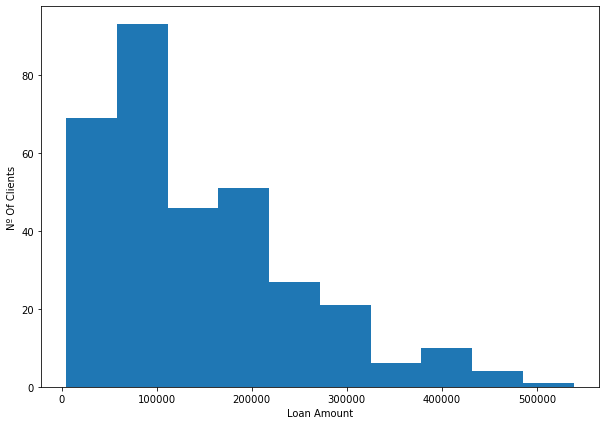

In [98]:
plt.figure(figsize=(10, 7))

plt.xlabel('Loan Amount')
plt.ylabel('Nº Of Clients')
loan_amount = plt.hist(loan['amount'])
plt.show()

### Scatter Plot

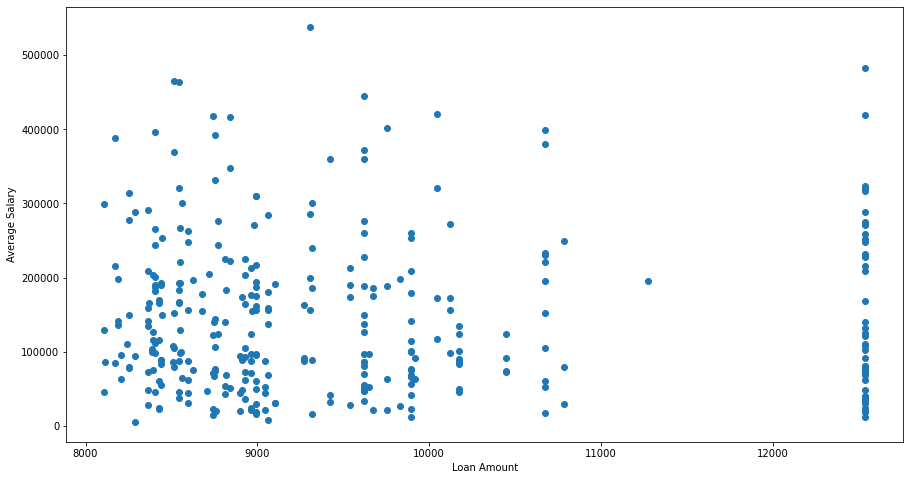

In [99]:
plt.figure(figsize=(15, 8))

plt.xlabel('Loan Amount')
plt.ylabel('Average Salary')
salary_amount = plt.scatter(x=loan_demograph["average salary "], y=loan_demograph["amount"],)
plt.show()

### Bar Plot

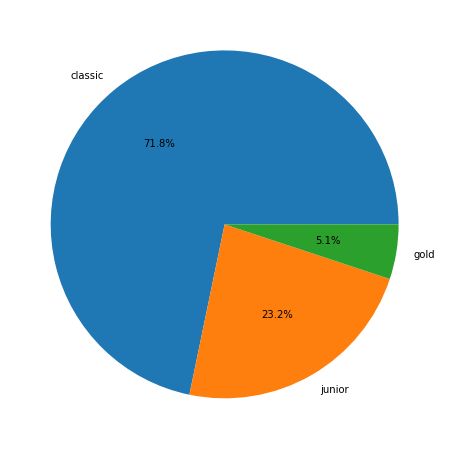

"           \nplt.xlabel('Card Types')\nplt.ylabel('Nº clients')            \nplt.bar(dic.keys(), dic.values())\nplt.show()\n"

In [100]:
dic = {}

for type in card["type"]:
    if type == "junior": 
        if type not in dic.keys():
            dic['junior'] = 1
        else:
            dic['junior'] += 1
    if type == "classic":
        if type not in dic.keys():
            dic['classic'] = 1
        else:
            dic['classic'] += 1
    if type == "gold":
        if type not in dic.keys():
            dic['gold'] = 1
        else:
            dic['gold'] += 1

            
plt.figure(figsize=(10, 8))
plt.pie(dic.values(), labels = dic.keys(), autopct='%1.1f%%')
plt.show()

'''           
plt.xlabel('Card Types')
plt.ylabel('Nº clients')            
plt.bar(dic.keys(), dic.values())
plt.show()
'''

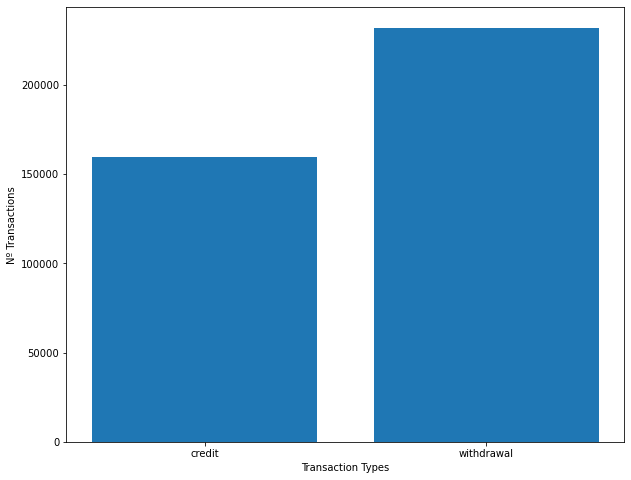

In [101]:
dic = {}

for type in transactions["type"]:
    if type == "credit": 
        if type not in dic.keys():
            dic['credit'] = 1
        else:
            dic['credit'] += 1
    if type == "withdrawal":
        if type not in dic.keys():
            dic['withdrawal'] = 1
        else:
            dic['withdrawal'] += 1
            

plt.figure(figsize=(10, 8))
            
plt.xlabel('Transaction Types')
plt.ylabel('Nº Transactions')            
plt.bar(dic.keys(), dic.values())
plt.show()            

### Correlation Matrix

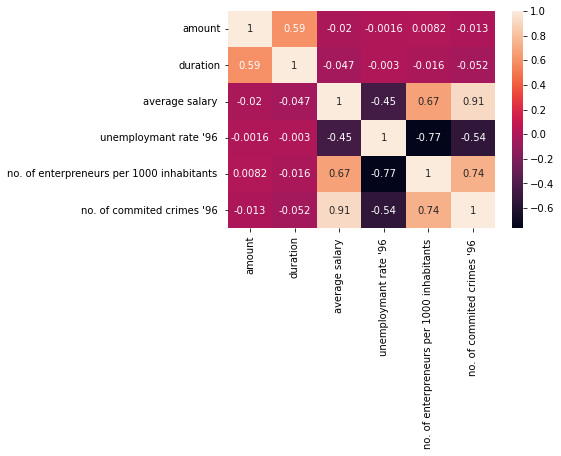

In [102]:
corr_matrix = loan_demograph[["amount", "duration", "average salary ", "unemploymant rate '95 ", "unemploymant rate '96 ", "no. of enterpreneurs per 1000 inhabitants ", "no. of commited crimes '95 ", "no. of commited crimes '96 "]].corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

plot_corr = sns.heatmap(corr_matrix, annot=True)

## Missing Values

### Account Table Missing Values

In [103]:
display(account.describe())
print(account.isnull().sum() / len(account))

,account_id,district_id,date
count,4500.000000,4500.000000,4500.000000
mean,2786.067556,37.310444,951654.608667
std,2313.811984,25.177217,14842.188377
min,1.000000,1.000000,930101.000000
25%,1182.750000,13.000000,931227.000000
50%,2368.000000,38.000000,960102.000000
75%,3552.250000,60.000000,961101.000000
max,11382.000000,77.000000,971229.000000


account_id     0.0
district_id    0.0
frequency      0.0
date           0.0
dtype: float64


### Card_dev Table Missing Values

In [104]:
display(card.describe())
print(card.isnull().sum() / len(card))

,card_id,disp_id,issued
count,177.000000,177.000000,177.000000
mean,433.576271,3031.723164,954971.259887
std,290.507562,2632.338944,7217.974691
min,3.000000,41.000000,931107.000000
25%,183.000000,1080.000000,950616.000000
50%,397.000000,2513.000000,960221.000000
75%,661.000000,4270.000000,960831.000000
max,1247.000000,13660.000000,961231.000000


card_id    0.0
disp_id    0.0
type       0.0
issued     0.0
dtype: float64


### Client Table Missing Values

In [105]:
display(client.describe())
print(client.isnull().sum() / len(client))

,client_id,birth_number,district_id
count,5369.000000,5369.000000,5369.000000
mean,3359.011920,535114.970013,37.310114
std,2832.911984,172895.618429,25.043690
min,1.000000,110820.000000,1.000000
25%,1418.000000,406009.000000,14.000000
50%,2839.000000,540829.000000,38.000000
75%,4257.000000,681013.000000,60.000000
max,13998.000000,875927.000000,77.000000


client_id       0.0
birth_number    0.0
district_id     0.0
dtype: float64


### Disp Table Missing Values

In [106]:
display(disposition.describe())
print(disposition.isnull().sum() / len(disposition))

,disp_id,client_id,account_id
count,5369.000000,5369.000000,5369.000000
mean,3337.097970,3359.011920,2767.496927
std,2770.418826,2832.911984,2307.843630
min,1.000000,1.000000,1.000000
25%,1418.000000,1418.000000,1178.000000
50%,2839.000000,2839.000000,2349.000000
75%,4257.000000,4257.000000,3526.000000
max,13690.000000,13998.000000,11382.000000


disp_id       0.0
client_id     0.0
account_id    0.0
type          0.0
dtype: float64


### District Table Missing Values

In [109]:
display(demograph.describe())
print(demograph.isnull().sum() / len(demograph))

,code,no. of inhabitants,no. of municipalities with inhabitants < 499,no. of municipalities with inhabitants 500-1999,no. of municipalities with inhabitants 2000-9999,no. of municipalities with inhabitants >10000,no. of cities,ratio of urban inhabitants,average salary,unemploymant rate '96,no. of enterpreneurs per 1000 inhabitants,no. of commited crimes '96
count,77.000000,7.700000e+01,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,39.000000,1.338849e+05,48.623377,24.324675,6.272727,1.727273,6.259740,63.035065,9031.675325,3.787013,116.129870,5030.831169
std,22.371857,1.369135e+05,32.741829,12.780991,4.015222,1.008338,2.435497,16.221727,790.202347,1.908480,16.608773,11270.796786
min,1.000000,4.282100e+04,0.000000,0.000000,0.000000,0.000000,1.000000,33.900000,8110.000000,0.430000,81.000000,888.000000
25%,20.000000,8.585200e+04,22.000000,16.000000,4.000000,1.000000,5.000000,51.900000,8512.000000,2.310000,105.000000,2122.000000
50%,39.000000,1.088710e+05,49.000000,25.000000,6.000000,2.000000,6.000000,59.800000,8814.000000,3.600000,113.000000,3040.000000
75%,58.000000,1.390120e+05,71.000000,32.000000,8.000000,2.000000,8.000000,73.500000,9317.000000,4.790000,126.000000,4595.000000
max,77.000000,1.204953e+06,151.000000,70.000000,20.000000,5.000000,11.000000,100.000000,12541.000000,9.400000,167.000000,99107.000000


code                                                 0.0
name                                                 0.0
region                                               0.0
no. of inhabitants                                   0.0
no. of municipalities with inhabitants < 499         0.0
no. of municipalities with inhabitants 500-1999      0.0
no. of municipalities with inhabitants 2000-9999     0.0
no. of municipalities with inhabitants >10000        0.0
no. of cities                                        0.0
ratio of urban inhabitants                           0.0
average salary                                       0.0
unemploymant rate '95                                0.0
unemploymant rate '96                                0.0
no. of enterpreneurs per 1000 inhabitants            0.0
no. of commited crimes '95                           0.0
no. of commited crimes '96                           0.0
dtype: float64


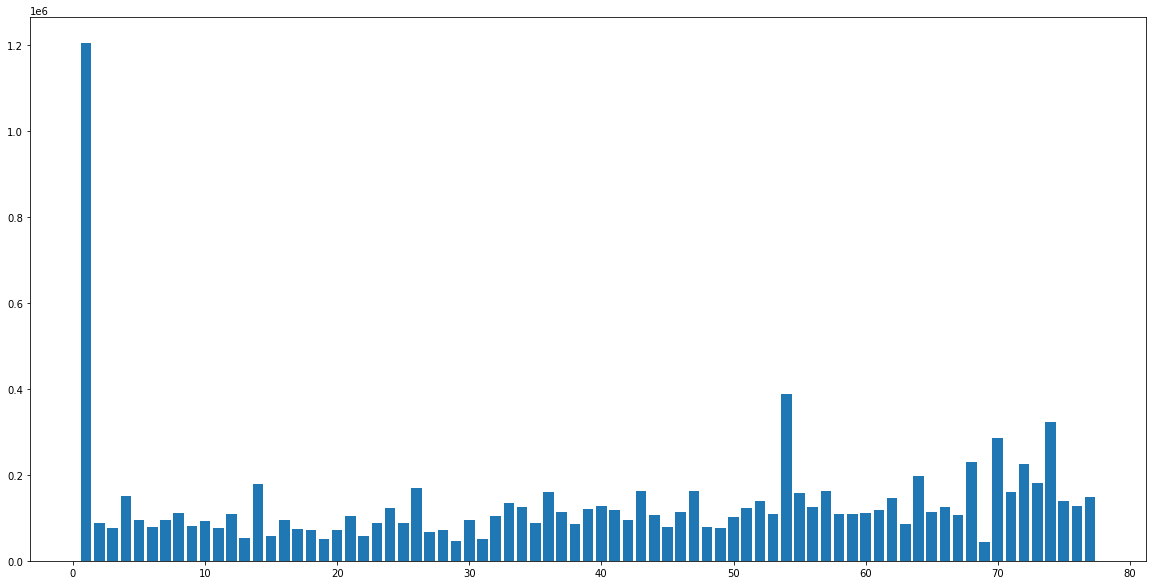

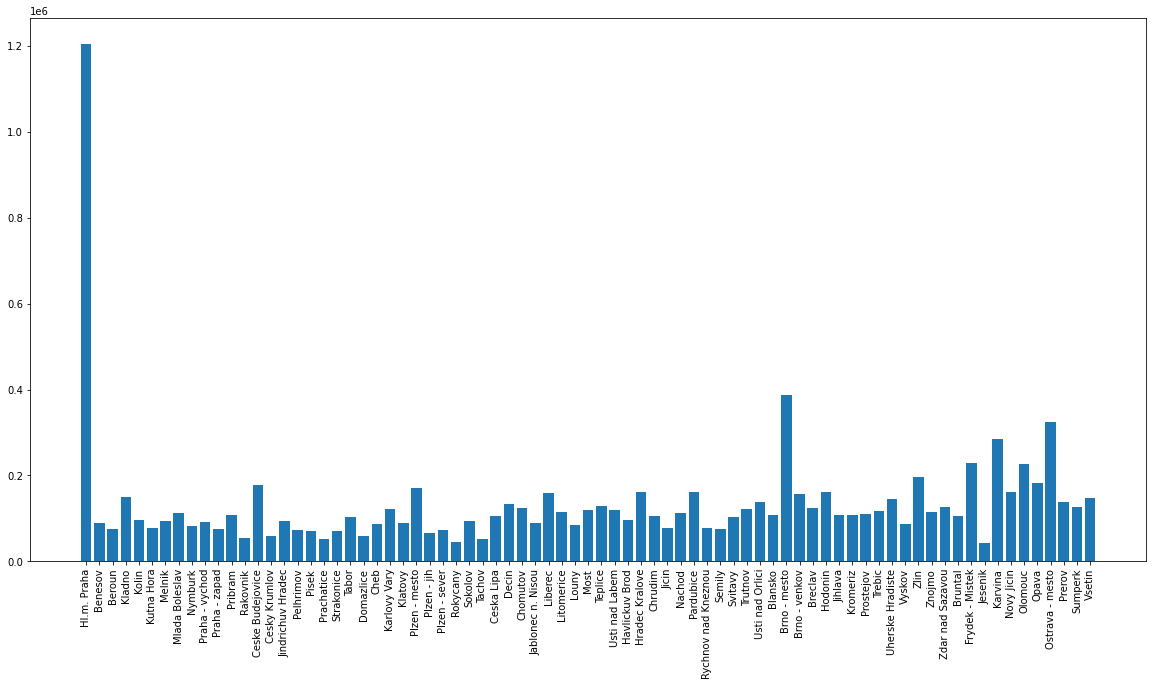

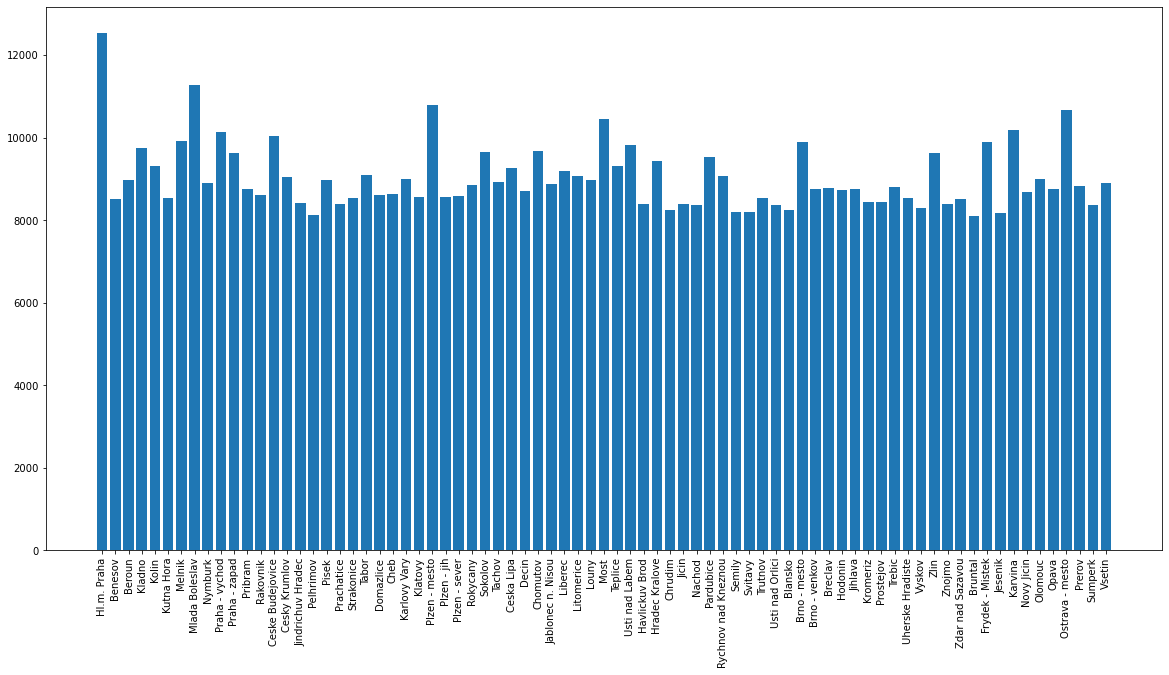

In [84]:
#fig2, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,16), sharey=False)
#fig2.tight_layout()  
#fig2.subplots_adjust(top=0.96) 


plt.figure(figsize=(20, 10))
plt.bar(demograph['code '], demograph['no. of inhabitants'])


plt.figure(figsize=(20, 10))
plt.xticks(rotation='vertical')
plt.bar(demograph['name '], demograph['no. of inhabitants'])


plt.figure(figsize=(20, 10))
plt.xticks(rotation='vertical')
plt.bar(demograph['name '], demograph['average salary '])

plt.show()



### Loan_dev Table Missing Values

In [23]:
display(loan.describe())
print(loan.isnull().sum() / len(loan))

,loan_id,account_id,date,amount,duration,payments,status
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,6205.658537,5982.085366,949989.125000,145308.621951,35.853659,4150.932927,0.719512
std,667.985675,3213.262492,9495.504646,105247.318098,16.734752,2193.620989,0.695541
min,4959.000000,2.000000,930705.000000,4980.000000,12.000000,319.000000,-1.000000
25%,5604.250000,3079.000000,940809.250000,68328.000000,24.000000,2368.750000,1.000000
50%,6227.500000,6032.000000,950565.500000,114804.000000,36.000000,3878.500000,1.000000
75%,6737.250000,8564.500000,960525.250000,198600.000000,48.000000,5907.750000,1.000000
max,7308.000000,11362.000000,961227.000000,538500.000000,60.000000,9689.000000,1.000000


loan_id       0.0
account_id    0.0
date          0.0
amount        0.0
duration      0.0
payments      0.0
status        0.0
dtype: float64


### Trans_dev Table Missing Values

In [22]:
display(transactions.describe())
print(transactions.isnull().sum() / len(transactions))

,trans_id,account_id,date,amount,balance,account
count,3.966850e+05,396685.000000,396685.000000,396685.000000,396685.000000,1.022290e+05
mean,1.239338e+06,2508.434796,951310.066801,5677.552980,35804.792507,4.664229e+07
std,1.213288e+06,2020.928889,9510.974536,9190.364137,19692.148243,3.002136e+07
min,1.000000e+00,1.000000,930101.000000,0.000000,-13588.700000,0.000000e+00
25%,3.918330e+05,1092.000000,941110.000000,127.500000,22424.300000,1.990018e+07
50%,7.882580e+05,2220.000000,950930.000000,1952.000000,30959.600000,4.673618e+07
75%,1.273700e+06,3357.000000,960606.000000,6500.000000,44661.000000,7.232217e+07
max,3.682934e+06,11382.000000,961231.000000,86400.000000,193909.900000,9.998564e+07


trans_id      0.000000
account_id    0.000000
date          0.000000
type          0.000000
operation     0.178381
amount        0.000000
balance       0.000000
k_symbol      0.466980
bank          0.754863
account       0.742292
dtype: float64


# Loan Success 

In [20]:
account = pd.read_csv("refined/account.csv", sep=",")
card = pd.read_csv("refined/card.csv", sep=",")
client = pd.read_csv("refined/client.csv", sep=",")
disposition = pd.read_csv("refined/disposition.csv", sep=",")
demograph = pd.read_csv("refined/district.csv",sep=",")
loan = pd.read_csv("refined/loan.csv", sep=",")
transactions = pd.read_csv("refined/transaction.csv",sep=",", low_memory=False)

In [21]:
loan.head()

,Unnamed: 0,loan_id,account_id,loan_date,loan_amount,loan_duration,loan_payments,loan_status
0,0,5895,4473,1997-01-03,93960,60,1566,NaN
1,1,7122,10365,1997-01-04,260640,36,7240,NaN
2,2,6173,5724,1997-01-08,232560,48,4845,NaN
3,3,6142,5591,1997-01-21,221880,60,3698,NaN
4,4,5358,2018,1997-01-21,38520,12,3210,NaN
